<a href="https://colab.research.google.com/github/salsabillaflsft/MachineLearningProject/blob/main/recommender_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library

In [ ]:
import numpy as np # mathematical functions
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt

### Import Data

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
%cd /content/drive/My Drive/Course/Project-ML

/content/drive/My Drive/Course/Project-ML


### Data Cleansing

In [ ]:
data = pd.read_csv("coins.csv")
data.head()

,id,name,slug,symbol,status,category,description,subreddit,notice,tags,...,message_board,chat,explorer,reddit,technical_doc,source_code,announcement,platform_id,date_added,date_launched
0,1,Bitcoin,bitcoin,BTC,active,coin,## **What Is Bitcoin (BTC)?**\n\nBitcoin is a ...,bitcoin,NaN,"mineable, pow, sha-256, store-of-value, state-...",...,https://bitcointalk.org,NaN,https://blockchain.coinmarketcap.com/chain/bit...,https://reddit.com/r/bitcoin,https://bitcoin.org/bitcoin.pdf,https://github.com/bitcoin/,NaN,NaN,2013-04-28T00:00:00.000Z,NaN
1,2,Litecoin,litecoin,LTC,active,coin,## What Is Litecoin (LTC)?\n\nLitecoin (LTC) i...,litecoin,NaN,"mineable, pow, scrypt, medium-of-exchange, bin...",...,"https://litecointalk.io/, https://litecoin-fou...",https://telegram.me/litecoin,"https://blockchair.com/litecoin, https://chain...",https://reddit.com/r/litecoin,NaN,https://github.com/litecoin-project/litecoin,https://bitcointalk.org/index.php?topic=47417.0,NaN,2013-04-28T00:00:00.000Z,NaN
2,3,Namecoin,namecoin,NMC,active,coin,Namecoin (NMC) is a cryptocurrency . Users are...,namecoin,NaN,"mineable, pow, sha-256, platform",...,NaN,https://telegram.me/namecoin,"https://nmc.tokenview.com/, https://www.namebr...",https://reddit.com/r/namecoin,NaN,https://github.com/namecoin,https://bitcointalk.org/?topic=6017.0,NaN,2013-04-28T00:00:00.000Z,NaN
3,4,Terracoin,terracoin,TRC,active,coin,Terracoin (TRC) launched in 2012 with the aim ...,terracoin,NaN,"mineable, pow, sha-256, masternodes",...,https://medium.com/@clockuniverse,"https://mattermost.terracoin.io/, https://t.me...","https://insight.terracoin.io/, https://explore...",https://reddit.com/r/terracoin,https://wiki.terracoin.io/view/Whitepaper,https://github.com/terracoin,https://bitcointalk.org/index.php?topic=1364146.0,NaN,2013-04-28T00:00:00.000Z,NaN
4,5,Peercoin,peercoin,PPC,active,coin,Peercoin (PPC) is a cryptocurrency . Users are...,peercoin,NaN,"mineable, hybrid-pow-pos, sha-256, medium-of-e...",...,https://talk.peercoin.net,"https://t.me/peercoin, https://discord.gg/m294ReV","https://chainz.cryptoid.info/ppc/, https://exp...",https://reddit.com/r/peercoin,https://docs.peercoin.net/,https://github.com/peercoin,https://bitcointalk.org/index.php?topic=101820.0,NaN,2013-04-28T00:00:00.000Z,NaN


In [ ]:
data.shape #check data shape

(8927, 23)

In [ ]:
#drop unused colums
data = data.drop(columns=['description','subreddit','notice','twitter','message_board','chat','explorer','reddit','technical_doc','source_code','announcement','platform_id','date_added','date_launched'])

In [ ]:
data.head()

,id,name,slug,symbol,status,category,tags,tag_names,website
0,1,Bitcoin,bitcoin,BTC,active,coin,"mineable, pow, sha-256, store-of-value, state-...","Mineable, PoW, SHA-256, Store of Value, State ...",https://bitcoin.org/
1,2,Litecoin,litecoin,LTC,active,coin,"mineable, pow, scrypt, medium-of-exchange, bin...","Mineable, PoW, Scrypt, Medium of Exchange, Bin...",https://litecoin.org/
2,3,Namecoin,namecoin,NMC,active,coin,"mineable, pow, sha-256, platform","Mineable, PoW, SHA-256, Platform",https://www.namecoin.org/
3,4,Terracoin,terracoin,TRC,active,coin,"mineable, pow, sha-256, masternodes","Mineable, PoW, SHA-256, Masternodes",http://www.terracoin.io/
4,5,Peercoin,peercoin,PPC,active,coin,"mineable, hybrid-pow-pos, sha-256, medium-of-e...","Mineable, Hybrid - PoW & PoS, SHA-256, Medium ...",http://www.peercoin.net


In [ ]:
#check data shape
data.shape

(8927, 9)

In [ ]:
#check each data type of columns and missing values
data.info() 
data.isnull().sum() 
#/ data.shape[0] * 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8927 entries, 0 to 8926
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         8927 non-null   int64 
 1   name       8927 non-null   object
 2   slug       8927 non-null   object
 3   symbol     8927 non-null   object
 4   status     8927 non-null   object
 5   category   8869 non-null   object
 6   tags       3754 non-null   object
 7   tag_names  3747 non-null   object
 8   website    8506 non-null   object
dtypes: int64(1), object(8)
memory usage: 627.8+ KB


id              0
name            0
slug            0
symbol          0
status          0
category       58
tags         5173
tag_names    5180
website       421
dtype: int64

### Data Preparation

In [ ]:
#drop data with missing values
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3610 entries, 0 to 8893
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3610 non-null   int64 
 1   name       3610 non-null   object
 2   slug       3610 non-null   object
 3   symbol     3610 non-null   object
 4   status     3610 non-null   object
 5   category   3610 non-null   object
 6   tags       3610 non-null   object
 7   tag_names  3610 non-null   object
 8   website    3610 non-null   object
dtypes: int64(1), object(8)
memory usage: 282.0+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


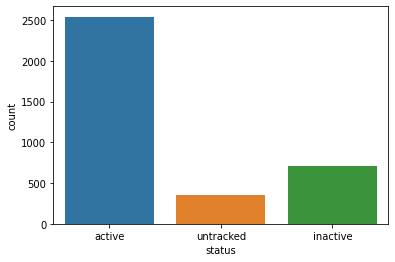

In [ ]:
sns.countplot(data.status)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


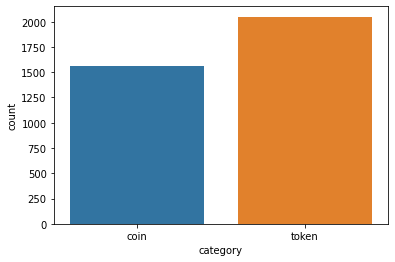

In [ ]:
sns.countplot(data.category)
plt.show()

In [ ]:
#drop data with untracked & inactive status
index = data[(data['status'] == 'untracked') | (data['status'] == 'inactive')].index
data.drop(index, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


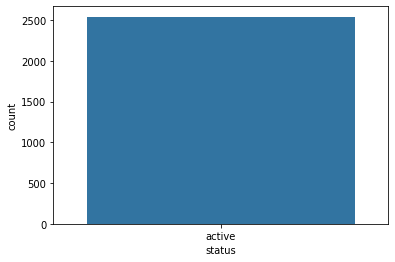

In [ ]:
sns.countplot(data.status)
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2540 entries, 0 to 8893
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         2540 non-null   int64 
 1   name       2540 non-null   object
 2   slug       2540 non-null   object
 3   symbol     2540 non-null   object
 4   status     2540 non-null   object
 5   category   2540 non-null   object
 6   tags       2540 non-null   object
 7   tag_names  2540 non-null   object
 8   website    2540 non-null   object
dtypes: int64(1), object(8)
memory usage: 263.0+ KB


In [ ]:
data.head()

,id,name,slug,symbol,status,category,tags,tag_names,website
0,1,Bitcoin,bitcoin,BTC,active,coin,"mineable, pow, sha-256, store-of-value, state-...","Mineable, PoW, SHA-256, Store of Value, State ...",https://bitcoin.org/
1,2,Litecoin,litecoin,LTC,active,coin,"mineable, pow, scrypt, medium-of-exchange, bin...","Mineable, PoW, Scrypt, Medium of Exchange, Bin...",https://litecoin.org/
2,3,Namecoin,namecoin,NMC,active,coin,"mineable, pow, sha-256, platform","Mineable, PoW, SHA-256, Platform",https://www.namecoin.org/
3,4,Terracoin,terracoin,TRC,active,coin,"mineable, pow, sha-256, masternodes","Mineable, PoW, SHA-256, Masternodes",http://www.terracoin.io/
4,5,Peercoin,peercoin,PPC,active,coin,"mineable, hybrid-pow-pos, sha-256, medium-of-e...","Mineable, Hybrid - PoW & PoS, SHA-256, Medium ...",http://www.peercoin.net


### Model

TF-IDF

Cosine Similarity

Recommender

### Evaluate